In [1]:
from DynaAgent import DynaAgent
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
# env = gym.make('MountainCar-v0')
env = gym.make('MountainCar-v0', render_mode="human")

In [2]:
testDyna = DynaAgent(env, discr_step=[0.1,0.01], k_updates=1, should_log=True)

-----------variables--------
number of positions = 17
number of velocity = 14
number of states = 238
self.discretization_position = [-1.2        -1.09411765 -0.98823529 -0.88235294 -0.77647059 -0.67058824
 -0.56470588 -0.45882353 -0.35294118 -0.24705882 -0.14117647 -0.03529412
  0.07058824  0.17647059  0.28235294  0.38823529  0.49411765  0.6       ]
self.discretization_speed = [-0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04
  0.05  0.06  0.07]
-----------------------------------------
------------------------------------------
We will log this experiment in directory ./runs/new@discr_step=[0.1, 0.01]@discount_factor=0.99@k_updates=1@20240525-132427
------------------------------------------


In [3]:
total_reward = testDyna.run(num_episodes=3000)

  2%|▏         | 49/3000 [05:32<5:33:47,  6.79s/it]


KeyboardInterrupt: 

In [12]:
plt.plot(total_reward)

NameError: name 'total_reward' is not defined

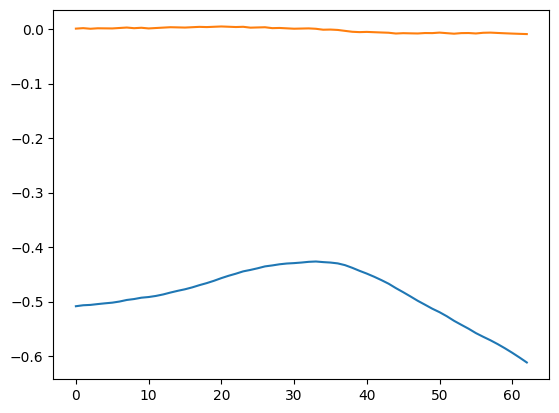

In [11]:
plt.plot(testDyna.observations)

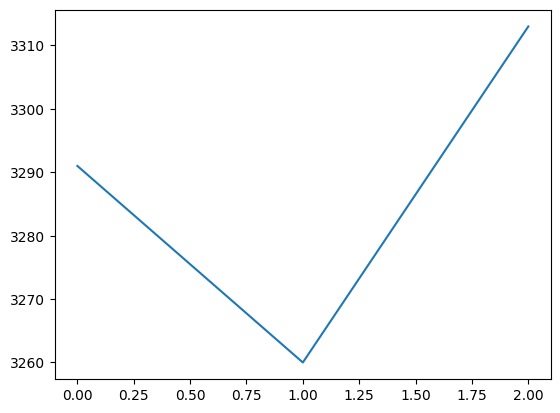

In [9]:
plt.plot(testDyna.freq_actions)

In [10]:
testDyna.freq_actions

[3291, 3260, 3313]

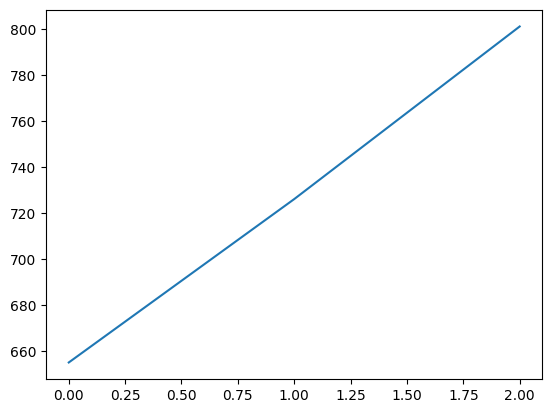

In [6]:
plt.plot(testDyna.freq_result)

In [8]:
testDyna.freq_result

[655, 726, 801]